In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error
from datetime import datetime
import warnings
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score


warnings.filterwarnings("ignore")
sns.set_theme(style="darkgrid")

# Teams

In [2]:
home= "Freiburg"
away= "Dortmund"

In [3]:
df_home= pd.read_csv(f"../Data/{home}.csv")
df_home["Date"] = pd.to_datetime(df_home["Date"]) 
df_home.tail()

,Team,Opp,Date,Result,H/A,GF,GA,GD,G-PK,PK,...,xAG,xA,G-xG,np:G-xG,A-xAG,npxG/Sh,FKAtt,PSxG,PSxG/SoT,PSxG+/-
22,Freiburg,Werder Bremen,2025-02-21,W,H,5,0,5,5,0,...,1.4,0.9,3.2,3.2,1.6,0.14,1,1.1,0.13,1.1
23,Freiburg,Augsburg,2025-03-02,D,A,0,0,0,0,0,...,0.7,0.5,-0.8,-0.8,-0.7,0.11,1,0.3,0.06,0.3
24,Freiburg,RB Leipzig,2025-03-08,D,H,0,0,0,0,0,...,0.4,0.6,-0.5,-0.5,-0.4,0.05,1,1.1,0.35,1.1
25,Freiburg,Mainz 05,2025-03-15,D,A,2,2,0,2,0,...,2.6,2.7,-1.1,-1.1,-0.6,0.14,1,1.8,0.51,-0.2
26,Freiburg,Union Berlin,2025-03-30,L,H,1,2,-1,1,0,...,1.3,1.4,-0.4,-0.4,-0.3,0.16,1,1.1,0.18,-0.9


In [4]:
df_vs_home= pd.read_csv(f"../Data/vs {home}.csv")
df_vs_home["Date"] = pd.to_datetime(df_vs_home["Date"]) 
df_vs_home.tail()

,Team,Opp,Date,Result,H/A,GF,GA,GD,G-PK,PK,...,xAG,xA,G-xG,np:G-xG,A-xAG,npxG/Sh,FKAtt,PSxG,PSxG/SoT,PSxG+/-
22,Werder Bremen,Freiburg,2025-02-21,L,A,0,5,-5,0,0,...,0.2,0.7,-1.2,-0.4,-0.2,0.06,0,2.9,0.49,-2.1
23,Augsburg,Freiburg,2025-03-02,D,H,0,0,0,0,0,...,1.2,1.5,-1.5,-1.5,-1.2,0.11,1,0.7,0.23,0.7
24,RB Leipzig,Freiburg,2025-03-08,D,A,0,0,0,0,0,...,1.5,1.8,-1.5,-1.5,-1.5,0.09,1,0.5,0.26,0.5
25,Mainz 05,Freiburg,2025-03-15,D,H,2,2,0,2,0,...,1.2,2.0,0.7,0.7,0.8,0.14,0,3.0,0.38,1.0
26,Union Berlin,Freiburg,2025-03-30,W,A,2,1,1,2,0,...,0.7,0.7,1.0,1.0,0.3,0.10,1,1.4,0.48,0.4


In [5]:
df_away= pd.read_csv(f"../Data/{away}.csv")
df_away["Date"] = pd.to_datetime(df_away["Date"]) 
df_away.tail()

,Team,Opp,Date,Result,H/A,GF,GA,GD,G-PK,PK,...,xAG,xA,G-xG,np:G-xG,A-xAG,npxG/Sh,FKAtt,PSxG,PSxG/SoT,PSxG+/-
22,Dortmund,Union Berlin,2025-02-22,W,H,6,0,6,5,0,...,4.3,3.8,0.2,0.2,0.7,0.20,0,0.1,0.13,0.1
23,Dortmund,St. Pauli,2025-03-01,W,A,2,0,2,2,0,...,0.8,0.8,0.5,0.5,-0.8,0.12,0,0.5,0.46,0.5
24,Dortmund,Augsburg,2025-03-08,L,H,0,1,-1,0,0,...,1.0,1.3,-1.2,-1.2,-1.0,0.08,0,0.0,0.04,-1.0
25,Dortmund,RB Leipzig,2025-03-15,L,A,0,2,-2,0,0,...,2.7,3.8,-3.0,-3.0,-2.7,0.12,0,1.9,0.41,-0.1
26,Dortmund,Mainz 05,2025-03-30,W,H,3,1,2,3,0,...,2.7,2.8,0.2,0.2,0.3,0.16,1,0.4,0.22,-0.6


In [6]:
df_vs_away= pd.read_csv(f"../Data/vs {away}.csv")
df_vs_away["Date"] = pd.to_datetime(df_away["Date"]) 
df_vs_away.tail()

,Team,Opp,Date,Result,H/A,GF,GA,GD,G-PK,PK,...,xAG,xA,G-xG,np:G-xG,A-xAG,npxG/Sh,FKAtt,PSxG,PSxG/SoT,PSxG+/-
22,Union Berlin,Dortmund,2025-02-22,L,A,0,6,-6,0,0,...,0.2,1.3,-0.3,-0.3,-0.2,0.04,0,5.1,0.63,0.1
23,St. Pauli,Dortmund,2025-03-01,L,H,0,2,-2,0,0,...,0.2,0.7,-0.4,-0.4,-0.2,0.06,0,1.3,0.45,-0.7
24,Augsburg,Dortmund,2025-03-08,W,A,1,0,1,1,0,...,0.2,0.4,0.8,0.8,0.8,0.03,0,0.0,0.01,0.0
25,RB Leipzig,Dortmund,2025-03-15,W,H,2,0,2,2,0,...,1.7,1.7,0.2,0.2,0.3,0.12,0,2.6,0.30,2.6
26,Mainz 05,Dortmund,2025-03-30,L,A,1,3,-2,1,0,...,0.6,1.2,0.2,0.2,0.4,0.07,0,3.0,0.44,0.0


In [7]:
print(list(df_away.columns))

['Team', 'Opp', 'Date', 'Result', 'H/A', 'GF', 'GA', 'GD', 'G-PK', 'PK', 'PKatt', 'PKm', 'Poss', 'Att (GK)', 'Thr', 'Pa Launch%', 'Pa AvgLen', 'Won', 'Lost', 'Won%', 'Att To', 'Succ', 'Succ%', 'Tkld', 'Tkld%', 'Carries', 'TotDist', 'PrgDist', 'PrgC', 'Last3rd Car', 'OppCr', 'Stp', 'Stp%', 'CrdY', 'CrdR', '2CrdY', 'Fls', 'Fld', 'GCA', 'PassLive Gc', 'PassDead Gc', 'TO Gc', 'Sh-Gc', 'Fld Gc', 'Def-Gc', 'GK Att', 'Launch%', 'AvgLen', 'Sh', 'G/Sh', 'G/SoT', 'SoT', 'SoT%', 'Dist', 'FK', 'Off', 'PKwon', 'PKcon', 'OG', 'Recov', '#OPA', 'AvgDist', 'Cmp', 'Pas Att', 'Cmp%', 'KP', 'Last3rd PA', 'PPA', 'CrsPA', 'PrgP', 'TotDist Pas', 'PrgDist Pas', 'Cmp 5-15', 'Att 5-15', 'Cmp% 5-15', 'Cmp 15-30', 'Att 15-30', 'Cmp% 15-30', 'Cmp 30+', 'Att 30+', 'Cmp% 30+', 'PKdef', 'PKA', 'PKms', 'Missed PK%', 'PKAg', 'PKsv', 'PK Save%', 'FK Ag', 'CKG', 'OGK', 'Live Pas', 'Dead', 'Pas FK', 'TB', 'Sw', 'Crs', 'TI', 'CK', 'In', 'Out', 'Str', 'Ps Off', 'PTo', 'Rec', 'Last3rd Rec', 'CPA', 'Mis', 'Dis', 'SCA', 'PassL

# Desc

# Features

## Offense

In [8]:
offense= ['G-PK', 'PK', 'PKm', 'Poss', 'PKatt', 'Att To', 'Succ', 'Succ%', 'Tkld', 'Tkld%', 'Carries', 'TotDist', 'PrgDist', 
          'PrgC', 'Last3rd Car', 'GCA', 'PassLive Gc', 'PassDead Gc', 'TO Gc', 'Sh-Gc', 'Fld Gc', 'Def-Gc', 'Sh', 'G/Sh', 
          'G/SoT', 'SoT', 'SoT%', 'Dist', 'FK', 'Off', 'PKwon', 'Cmp', 'Pas Att', 'Cmp%', 'KP', 'Last3rd PA', 'PPA', 'CrsPA', 
          'PrgP', 'TotDist Pas', 'PrgDist Pas', 'Cmp 5-15', 'Att 5-15', 'Cmp% 5-15', 'Cmp 15-30', 'Att 15-30', 'Cmp% 15-30', 
          'Cmp 30+', 'Att 30+', 'Cmp% 30+', 'Live Pas', 'Dead', 'Pas FK', 'TB', 'Sw', 'Crs', 'TI', 'CK', 'In', 'Out', 'Str', 
          'Ps Off', 'PTo', 'Rec', 'Last3rd Rec', 'CPA', 'Mis', 'Dis', 'SCA', 'PassLive Sc', 'PassDead Sc', 'TO Sc', 'Sh-Sh', 
          'Fld Sc', 'Def-Sc', 'Touches', 'Def Pen', 'Tch Def 3rd', 'Tch Mid 3rd', 'Tch Att 3rd', 'Att Pen', 'Live Tch', 'xG', 
          'npxG', 'xGD', 'npxGD', 'xAG', 'xA', 'G-xG', 'np:G-xG', 'A-xAG', 'npxG/Sh', 'FKAtt', 'GF']

In [9]:
df_home_off= df_home[offense]
df_home_off.tail()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,xGD,npxGD,xAG,xA,G-xG,np:G-xG,A-xAG,npxG/Sh,FKAtt,GF
22,5,0,0,37,0,16,6,37.5,10,62.5,...,0.6,1.4,1.4,0.9,3.2,3.2,1.6,0.14,1,5
23,0,0,0,49,0,13,5,38.5,5,38.5,...,-0.7,-0.7,0.7,0.5,-0.8,-0.8,-0.7,0.11,1,0
24,0,0,0,53,0,17,4,23.5,12,70.6,...,-1.0,-1.0,0.4,0.6,-0.5,-0.5,-0.4,0.05,1,0
25,2,0,0,56,0,10,7,70.0,2,20.0,...,1.8,1.8,2.6,2.7,-1.1,-1.1,-0.6,0.14,1,2
26,1,0,0,72,0,18,10,55.6,6,33.3,...,0.4,0.4,1.3,1.4,-0.4,-0.4,-0.3,0.16,1,1


In [10]:
df_vs_home_off= df_vs_home[offense]
df_vs_home_off.tail()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,xGD,npxGD,xAG,xA,G-xG,np:G-xG,A-xAG,npxG/Sh,FKAtt,GF
22,0,0,1,63,1,17,7,41.2,8,47.1,...,-0.6,-1.4,0.2,0.7,-1.2,-0.4,-0.2,0.06,0,0
23,0,0,0,51,0,14,5,35.7,7,50.0,...,0.7,0.7,1.2,1.5,-1.5,-1.5,-1.2,0.11,1,0
24,0,0,0,47,0,10,5,50.0,5,50.0,...,1.0,1.0,1.5,1.8,-1.5,-1.5,-1.5,0.09,1,0
25,2,0,0,44,0,5,3,60.0,2,40.0,...,-1.8,-1.8,1.2,2.0,0.7,0.7,0.8,0.14,0,2
26,2,0,0,28,0,17,8,47.1,7,41.2,...,-0.4,-0.4,0.7,0.7,1.0,1.0,0.3,0.10,1,2


In [11]:
df_away_off= df_away[offense]
df_away_off.tail()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,xGD,npxGD,xAG,xA,G-xG,np:G-xG,A-xAG,npxG/Sh,FKAtt,GF
22,5,0,0,64,0,20,11,55.0,8,40.0,...,4.5,4.5,4.3,3.8,0.2,0.2,0.7,0.20,0,6
23,2,0,0,57,0,16,9,56.3,7,43.8,...,1.1,1.1,0.8,0.8,0.5,0.5,-0.8,0.12,0,2
24,0,0,0,71,0,19,6,31.6,10,52.6,...,1.0,1.0,1.0,1.3,-1.2,-1.2,-1.0,0.08,0,0
25,0,0,0,66,0,23,12,52.2,7,30.4,...,1.2,1.2,2.7,3.8,-3.0,-3.0,-2.7,0.12,0,0
26,3,0,0,44,0,25,9,36.0,16,64.0,...,2.0,2.0,2.7,2.8,0.2,0.2,0.3,0.16,1,3


In [12]:
df_vs_away_off= df_vs_away[offense]
df_vs_away_off.tail()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,xGD,npxGD,xAG,xA,G-xG,np:G-xG,A-xAG,npxG/Sh,FKAtt,GF
22,0,0,0,36,0,13,1,7.7,10,76.9,...,-4.5,-4.5,0.2,1.3,-0.3,-0.3,-0.2,0.04,0,0
23,0,0,0,43,0,18,7,38.9,9,50.0,...,-1.1,-1.1,0.2,0.7,-0.4,-0.4,-0.2,0.06,0,0
24,1,0,0,29,0,19,9,47.4,8,42.1,...,-1.0,-1.0,0.2,0.4,0.8,0.8,0.8,0.03,0,1
25,2,0,0,34,0,12,8,66.7,2,16.7,...,-1.2,-1.2,1.7,1.7,0.2,0.2,0.3,0.12,0,2
26,1,0,0,56,0,26,9,34.6,16,61.5,...,-2.0,-2.0,0.6,1.2,0.2,0.2,0.4,0.07,0,1


## Defence

In [13]:
defence= ['OppCr', 'Stp', 'Stp%', 'PKcon', '#OPA', 'AvgDist', 'PKsv', 'PK Save%', 'FK Ag', 'CKG', 'OGK', 'SoTA', 'Saves', 
          'Save%', 'Tkl', 'TklW', 'Tkl Def 3rd', 'Tkl Mid 3rd', 'Tkl Att 3rd', 'Tkl.2', 'Tkl Att', 'Tkl%', 'Lost Tkl', 
          'Ints', 'BlcSh', 'Pass', 'Int', 'Tkl+Int', 'Clr', 'Err',  'PSxG', 'PSxG/SoT', 'PSxG+/-', 'GA']

In [14]:
df_home_def= df_home[defence]
df_home_def.tail()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,BlcSh,Pass,Int,Tkl+Int,Clr,Err,PSxG,PSxG/SoT,PSxG+/-,GA
22,21,3,14.3,1,1,12.8,1,100.0,0,0,...,3,10,6,21,26,0,1.1,0.13,1.1,0
23,14,1,7.1,0,1,14.9,0,NaN,0,0,...,1,9,5,20,21,1,0.3,0.06,0.3,0
24,15,1,6.7,0,0,8.5,0,NaN,0,0,...,6,13,9,23,16,1,1.1,0.35,1.1,0
25,9,3,33.3,0,0,10.0,0,NaN,0,0,...,1,9,6,12,27,1,1.8,0.51,-0.2,2
26,8,1,12.5,0,2,14.7,0,NaN,0,0,...,1,12,2,13,27,1,1.1,0.18,-0.9,2


In [15]:
df_vs_home_def= df_vs_home[defence]
df_vs_home_def.tail()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,BlcSh,Pass,Int,Tkl+Int,Clr,Err,PSxG,PSxG/SoT,PSxG+/-,GA
22,10,0,0.0,0,1,18.3,0,NaN,1,1,...,6,14,10,28,17,1,2.9,0.49,-2.1,5
23,9,0,0.0,0,0,10.0,0,NaN,0,0,...,2,2,10,21,27,0,0.7,0.23,0.7,0
24,6,0,0.0,0,1,28.0,0,NaN,0,0,...,4,8,9,31,27,0,0.5,0.26,0.5,0
25,31,1,3.2,0,0,8.0,0,NaN,0,0,...,6,10,11,18,40,0,3.0,0.38,1.0,2
26,28,1,3.6,0,0,5.0,0,NaN,0,0,...,1,7,10,27,64,0,1.4,0.48,0.4,1


In [16]:
df_away_def= df_away[defence]
df_away_def.head()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,BlcSh,Pass,Int,Tkl+Int,Clr,Err,PSxG,PSxG/SoT,PSxG+/-,GA
0,15,1,6.7,0,1,9.3,0,NaN,0,0,...,1,8,1,23,20,0,0.3,0.15,0.3,0
1,21,0,0.0,0,0,4.0,0,NaN,0,0,...,4,7,10,23,30,1,0.0,0.04,0.0,0
2,13,0,0.0,1,0,10.5,0,0.0,0,0,...,4,13,7,15,20,1,1.7,0.21,-0.3,2
3,16,0,0.0,0,3,15.3,0,NaN,0,1,...,2,9,7,20,18,1,3.9,0.43,-1.1,5
4,8,0,0.0,0,0,12.7,0,NaN,0,0,...,2,5,9,19,7,1,2.0,0.40,0.0,2


In [17]:
df_vs_away_def= df_vs_away[defence]
df_vs_away_def.head()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,BlcSh,Pass,Int,Tkl+Int,Clr,Err,PSxG,PSxG/SoT,PSxG+/-,GA
0,20,1,5.0,0,0,2.0,0,NaN,0,0,...,8,10,9,25,27,0,1.3,0.25,-0.7,2
1,14,1,7.1,0,1,18.3,0,NaN,0,0,...,1,0,9,24,18,0,0.6,0.14,0.6,0
2,18,0,0.0,1,2,32.5,0,0.0,0,0,...,4,8,5,22,36,0,2.3,0.26,-1.7,4
3,10,1,10.0,0,0,9.5,0,NaN,0,0,...,1,13,7,22,18,0,0.4,0.12,-0.6,1
4,23,3,13.0,1,0,2.8,0,0.0,0,0,...,7,6,9,29,25,1,1.9,0.12,-2.1,4


## Combined

In [18]:
combined= ['Won', 'Lost', 'Won%', 'CrdY', 'CrdR', '2CrdY', 'Fls', 'Fld', 'Recov']

In [19]:
df_home_cmb= df_home[combined]
df_home_cmb.tail()

,Won,Lost,Won%,CrdY,CrdR,2CrdY,Fls,Fld,Recov
22,18,13,58.1,3,0,0,14,8,45
23,11,16,40.7,1,0,0,9,12,44
24,18,18,50.0,0,0,0,6,10,40
25,31,17,64.6,2,0,0,7,7,40
26,23,25,47.9,3,0,0,8,11,38


In [20]:
df_vs_home_cmb= df_vs_home[combined]
df_vs_home_cmb.tail()

,Won,Lost,Won%,CrdY,CrdR,2CrdY,Fls,Fld,Recov
22,13,18,41.9,0,0,0,8,12,42
23,16,11,59.3,1,0,0,13,8,45
24,18,18,50.0,3,0,0,11,6,39
25,17,31,35.4,1,1,0,7,6,35
26,25,23,52.1,4,0,0,11,8,26


In [21]:
df_away_cmb= df_away[combined]
df_away_cmb.tail()

,Won,Lost,Won%,CrdY,CrdR,2CrdY,Fls,Fld,Recov
22,21,14,60.0,2,0,0,10,10,49
23,19,18,51.4,2,0,0,13,10,43
24,14,15,48.3,1,0,0,6,12,57
25,13,17,43.3,3,0,0,10,14,54
26,21,17,55.3,2,0,0,10,8,52


In [22]:
df_vs_away_cmb= df_vs_away[combined]
df_vs_away_cmb.tail()

,Won,Lost,Won%,CrdY,CrdR,2CrdY,Fls,Fld,Recov
22,14,21,40.0,2,0,0,11,9,35
23,18,19,48.6,1,0,0,11,13,42
24,15,14,51.7,4,0,0,12,6,43
25,17,13,56.7,3,0,0,14,10,44
26,17,21,44.7,0,0,0,8,10,52


## By Team

In [23]:
def create_lagged_features(df, target_cols, window= 4):
    """
    Creates lagged and rolling window features for a given dataset.
    
    Parameters:
    df (pd.DataFrame): The input dataframe containing game-by-game data.
    team_col (str): The column name representing the team.
    date_col (str): The column name representing the game date.
    target_cols (list): List of columns to create lagged and rolling features for.
    opponent_col (str, optional): Column representing the opponent team (if applicable).
    lags (list): List of lag periods to include.
    rolling_windows (list): List of rolling window sizes for moving averages and std dev.
    
    Returns:
    pd.DataFrame: Dataframe with additional lagged and rolling features.
    """
    df = df.copy()
    
    
    # Create lagged features for the given columns
    #for col in target_cols:
     #   for lag in range(1, window+1):
      #      df[f'{col}_lag_{lag}'] = df[col].shift(lag)
    
    # Create rolling window features (mean & std)
    for col in target_cols:
        df[f'{col}_rolling_avg_{window}'] = df[col].shift(1).rolling(window, min_periods= 1).mean()
        df[f'{col}_rolling_std_{window}'] = df[col].shift(1).rolling(window, min_periods= 1).std()
    
    # Fill NA values (after shifting to avoid data leakage)
    df = df.fillna(0)
    
    return df


In [24]:
df_home_off= create_lagged_features(df_home_off, offense)
df_home_off.tail()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,np:G-xG_rolling_avg_4,np:G-xG_rolling_std_4,A-xAG_rolling_avg_4,A-xAG_rolling_std_4,npxG/Sh_rolling_avg_4,npxG/Sh_rolling_std_4,FKAtt_rolling_avg_4,FKAtt_rolling_std_4,GF_rolling_avg_4,GF_rolling_std_4
22,5,0,0,37,0,16,6,37.5,10,62.5,...,-0.125,0.623832,0.025,0.403113,0.1025,0.035940,0.75,0.957427,1.00,0.000000
23,0,0,0,49,0,13,5,38.5,5,38.5,...,0.500,1.823915,0.275,0.892095,0.1250,0.012910,1.00,0.816497,2.00,2.000000
24,0,0,0,53,0,17,4,23.5,12,70.6,...,0.475,1.846393,0.150,1.008299,0.1200,0.014142,1.00,0.816497,1.75,2.217356
25,2,0,0,56,0,10,7,70.0,2,20.0,...,0.350,1.905256,0.050,1.047219,0.1050,0.038730,1.25,0.500000,1.50,2.380476
26,1,0,0,72,0,18,10,55.6,6,33.3,...,0.200,2.014944,-0.025,1.090489,0.1100,0.042426,1.00,0.000000,1.75,2.362908


In [25]:
df_vs_home_off= create_lagged_features(df_vs_home_off, offense)
df_vs_home_off.tail()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,np:G-xG_rolling_avg_4,np:G-xG_rolling_std_4,A-xAG_rolling_avg_4,A-xAG_rolling_std_4,npxG/Sh_rolling_avg_4,npxG/Sh_rolling_std_4,FKAtt_rolling_avg_4,FKAtt_rolling_std_4,GF_rolling_avg_4,GF_rolling_std_4
22,0,0,1,63,1,17,7,41.2,8,47.1,...,-0.175,0.850000,0.100,1.086278,0.0650,0.050662,0.00,0.00000,0.5,1.0
23,0,0,0,51,0,14,5,35.7,7,50.0,...,-0.525,0.340343,-0.375,0.236291,0.0450,0.012910,0.00,0.00000,0.0,0.0
24,0,0,0,47,0,10,5,50.0,5,50.0,...,-0.650,0.580230,-0.500,0.476095,0.0625,0.034034,0.25,0.50000,0.0,0.0
25,2,0,0,44,0,5,3,60.0,2,40.0,...,-0.900,0.697615,-0.775,0.675154,0.0725,0.035000,0.50,0.57735,0.0,0.0
26,2,0,0,28,0,17,8,47.1,7,41.2,...,-0.675,1.053170,-0.525,1.043631,0.1000,0.033665,0.50,0.57735,0.5,1.0


In [26]:
df_away_def= create_lagged_features(df_away_def, defence)
df_away_def.tail()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,Err_rolling_avg_4,Err_rolling_std_4,PSxG_rolling_avg_4,PSxG_rolling_std_4,PSxG/SoT_rolling_avg_4,PSxG/SoT_rolling_std_4,PSxG+/-_rolling_avg_4,PSxG+/-_rolling_std_4,GA_rolling_avg_4,GA_rolling_std_4
22,11,1,9.1,0,1,9.5,0,0.0,0,0,...,0.75,0.957427,1.825,1.314978,0.3500,0.136382,0.325,0.946485,1.75,0.500000
23,16,0,0.0,0,0,6.0,0,0.0,0,0,...,0.75,0.957427,1.375,1.564981,0.2650,0.142478,0.375,0.921502,1.25,0.957427
24,8,0,0.0,0,0,11.0,0,0.0,0,0,...,0.75,0.957427,1.100,1.608312,0.3000,0.174165,0.350,0.914695,1.00,1.154701
25,10,0,0.0,0,5,20.5,0,0.0,0,1,...,0.75,0.957427,1.025,1.664081,0.2675,0.214068,0.275,1.034005,0.75,0.957427
26,17,2,11.8,0,2,12.7,0,0.0,0,0,...,0.25,0.500000,0.625,0.877021,0.2600,0.206398,-0.125,0.634429,0.75,0.957427


In [27]:
df_vs_away_def= create_lagged_features(df_vs_away_def, defence)
df_vs_away_def.tail()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,Err_rolling_avg_4,Err_rolling_std_4,PSxG_rolling_avg_4,PSxG_rolling_std_4,PSxG/SoT_rolling_avg_4,PSxG/SoT_rolling_std_4,PSxG+/-_rolling_avg_4,PSxG+/-_rolling_std_4,GA_rolling_avg_4,GA_rolling_std_4
22,19,1,5.3,0,1,9.6,0,0.0,0,0,...,1.00,0.816497,1.525,0.805709,0.3850,0.120139,0.525,0.221736,1.25,0.957427
23,6,1,16.7,0,0,7.4,0,0.0,0,0,...,1.25,0.957427,2.400,1.971463,0.4400,0.173781,0.400,0.294392,2.25,2.629956
24,38,3,7.9,0,2,8.9,0,0.0,0,0,...,2.00,0.816497,2.075,2.033675,0.4200,0.164317,0.075,0.579511,2.25,2.629956
25,26,1,3.8,0,2,11.6,0,0.0,0,0,...,1.50,1.290994,1.775,2.279437,0.3625,0.260432,0.025,0.573730,2.00,2.828427
26,13,0,0.0,0,4,16.6,0,0.0,0,2,...,1.75,1.258306,2.250,2.176388,0.3475,0.262345,0.500,1.444530,2.00,2.828427


In [28]:
df_away_off= create_lagged_features(df_away_off, offense)
df_away_off.tail()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,np:G-xG_rolling_avg_4,np:G-xG_rolling_std_4,A-xAG_rolling_avg_4,A-xAG_rolling_std_4,npxG/Sh_rolling_avg_4,npxG/Sh_rolling_std_4,FKAtt_rolling_avg_4,FKAtt_rolling_std_4,GF_rolling_avg_4,GF_rolling_std_4
22,5,0,0,64,0,20,11,55.0,8,40.0,...,-0.800,1.211060,-0.375,0.750000,0.1275,0.028723,1.25,0.957427,1.25,0.957427
23,2,0,0,57,0,16,9,56.3,7,43.8,...,-0.750,1.258306,-0.300,0.860233,0.1475,0.045000,1.00,1.154701,2.25,2.629956
24,0,0,0,71,0,19,6,31.6,10,52.6,...,-0.575,1.400893,-0.425,0.895824,0.1400,0.046904,1.00,1.154701,2.25,2.629956
25,0,0,0,66,0,23,12,52.2,7,30.4,...,-0.775,1.424488,-0.625,0.917878,0.1375,0.050580,0.50,1.000000,2.00,2.828427
26,3,0,0,44,0,25,9,36.0,16,64.0,...,-0.875,1.598697,-0.950,1.391642,0.1300,0.050332,0.00,0.000000,2.00,2.828427


In [29]:
df_vs_away_off= create_lagged_features(df_vs_away_off, offense)
df_vs_away_off.tail()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,np:G-xG_rolling_avg_4,np:G-xG_rolling_std_4,A-xAG_rolling_avg_4,A-xAG_rolling_std_4,npxG/Sh_rolling_avg_4,npxG/Sh_rolling_std_4,FKAtt_rolling_avg_4,FKAtt_rolling_std_4,GF_rolling_avg_4,GF_rolling_std_4
22,0,0,0,36,0,13,1,7.7,10,76.9,...,0.275,0.665207,0.600,0.294392,0.0975,0.046458,0.25,0.5,1.75,0.500000
23,0,0,0,43,0,18,7,38.9,9,50.0,...,0.025,0.639661,0.325,0.411299,0.0825,0.054391,0.00,0.0,1.25,0.957427
24,1,0,0,29,0,19,9,47.4,8,42.1,...,-0.175,0.607591,0.125,0.427200,0.0850,0.052599,0.00,0.0,1.00,1.154701
25,2,0,0,34,0,12,8,66.7,2,16.7,...,-0.150,0.655744,0.150,0.472582,0.0725,0.059652,0.00,0.0,0.75,0.957427
26,1,0,0,56,0,26,9,34.6,16,61.5,...,0.075,0.550000,0.175,0.478714,0.0625,0.040311,0.00,0.0,0.75,0.957427


In [30]:
df_home_def= create_lagged_features(df_home_def, defence)
df_home_def.tail()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,Err_rolling_avg_4,Err_rolling_std_4,PSxG_rolling_avg_4,PSxG_rolling_std_4,PSxG/SoT_rolling_avg_4,PSxG/SoT_rolling_std_4,PSxG+/-_rolling_avg_4,PSxG+/-_rolling_std_4,GA_rolling_avg_4,GA_rolling_std_4
22,21,3,14.3,1,1,12.8,1,100.0,0,0,...,0.25,0.50000,0.700,0.503322,0.1950,0.148885,0.200,0.765942,0.5,1.0
23,14,1,7.1,0,1,14.9,0,0.0,0,0,...,0.00,0.00000,0.675,0.471699,0.1300,0.072572,0.675,0.471699,0.0,0.0
24,15,1,6.7,0,0,8.5,0,0.0,0,0,...,0.25,0.50000,0.550,0.493288,0.0950,0.060277,0.550,0.493288,0.0,0.0
25,9,3,33.3,0,0,10.0,0,0.0,0,0,...,0.50,0.57735,0.625,0.561991,0.1425,0.144539,0.625,0.561991,0.0,0.0
26,8,1,12.5,0,2,14.7,0,0.0,0,0,...,0.75,0.50000,1.075,0.613052,0.2625,0.206135,0.575,0.639661,0.5,1.0


In [31]:
df_vs_home_def= create_lagged_features(df_vs_home_def, defence)
df_vs_home_def.tail()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,Err_rolling_avg_4,Err_rolling_std_4,PSxG_rolling_avg_4,PSxG_rolling_std_4,PSxG/SoT_rolling_avg_4,PSxG/SoT_rolling_std_4,PSxG+/-_rolling_avg_4,PSxG+/-_rolling_std_4,GA_rolling_avg_4,GA_rolling_std_4
22,10,0,0.0,0,1,18.3,0,0.0,1,1,...,0.00,0.0,1.325,0.250000,0.3725,0.159034,0.575,0.543906,1.00,0.000000
23,9,0,0.0,0,0,10.0,0,0.0,0,0,...,0.25,0.5,1.800,0.743864,0.3750,0.161348,0.050,1.484363,2.00,2.000000
24,6,0,0.0,0,1,28.0,0,0.0,0,0,...,0.25,0.5,1.575,0.935860,0.3325,0.174428,0.075,1.497498,1.75,2.217356
25,31,1,3.2,0,0,8.0,0,0.0,0,0,...,0.25,0.5,1.350,1.087811,0.2800,0.148997,0.100,1.505545,1.50,2.380476
26,28,1,3.6,0,0,5.0,0,0.0,0,0,...,0.25,0.5,1.775,1.359841,0.3400,0.119164,0.025,1.431491,1.75,2.362908


In [32]:
df_home_cmb.rename(columns= {col: f"h_{col}" for col in df_home_cmb.columns}, inplace= True)
df_home_cmb= create_lagged_features(df_home_cmb, df_home_cmb.columns)
df_home_cmb.tail()

,h_Won,h_Lost,h_Won%,h_CrdY,h_CrdR,h_2CrdY,h_Fls,h_Fld,h_Recov,h_Won_rolling_avg_4,...,h_CrdR_rolling_avg_4,h_CrdR_rolling_std_4,h_2CrdY_rolling_avg_4,h_2CrdY_rolling_std_4,h_Fls_rolling_avg_4,h_Fls_rolling_std_4,h_Fld_rolling_avg_4,h_Fld_rolling_std_4,h_Recov_rolling_avg_4,h_Recov_rolling_std_4
22,18,13,58.1,3,0,0,14,8,45,23.50,...,0.0,0.0,0.0,0.0,11.50,2.380476,10.00,2.708013,37.50,9.000000
23,11,16,40.7,1,0,0,9,12,44,24.25,...,0.0,0.0,0.0,0.0,11.25,1.892969,9.75,2.872281,39.25,9.776673
24,18,18,50.0,0,0,0,6,10,40,20.50,...,0.0,0.0,0.0,0.0,11.00,2.160247,9.25,1.892969,42.75,7.632169
25,31,17,64.6,2,0,0,7,7,40,17.25,...,0.0,0.0,0.0,0.0,9.75,3.304038,9.75,1.707825,40.25,5.909033
26,23,25,47.9,3,0,0,8,11,38,19.50,...,0.0,0.0,0.0,0.0,9.00,3.559026,9.25,2.217356,42.25,2.629956


In [33]:
df_vs_home_cmb.rename(columns= {col: f"vh_{col}" for col in df_vs_home_cmb.columns}, inplace= True)
df_vs_home_cmb= create_lagged_features(df_vs_home_cmb, df_vs_home_cmb.columns)
df_vs_home_cmb.tail()

,vh_Won,vh_Lost,vh_Won%,vh_CrdY,vh_CrdR,vh_2CrdY,vh_Fls,vh_Fld,vh_Recov,vh_Won_rolling_avg_4,...,vh_CrdR_rolling_avg_4,vh_CrdR_rolling_std_4,vh_2CrdY_rolling_avg_4,vh_2CrdY_rolling_std_4,vh_Fls_rolling_avg_4,vh_Fls_rolling_std_4,vh_Fld_rolling_avg_4,vh_Fld_rolling_std_4,vh_Recov_rolling_avg_4,vh_Recov_rolling_std_4
22,13,18,41.9,0,0,0,8,12,42,18.75,...,0.00,0.0,0.0,0.0,10.50,3.109126,11.50,2.380476,42.50,7.047458
23,16,11,59.3,1,0,0,13,8,45,20.00,...,0.00,0.0,0.0,0.0,10.25,3.304038,10.75,0.957427,43.75,6.130525
24,18,18,50.0,3,0,0,11,6,39,16.50,...,0.00,0.0,0.0,0.0,9.75,2.362908,10.25,1.707825,42.50,4.795832
25,17,31,35.4,1,1,0,7,6,35,16.75,...,0.00,0.0,0.0,0.0,10.50,2.081666,9.00,2.581989,40.50,3.872983
26,25,23,52.1,4,0,0,11,8,26,16.00,...,0.25,0.5,0.0,0.0,9.75,2.753785,8.00,2.828427,40.25,4.272002


In [34]:
df_away_cmb.rename(columns= {col: f"va_{col}" for col in df_away_cmb.columns}, inplace= True)
df_away_cmb= create_lagged_features(df_away_cmb, df_away_cmb.columns)
df_away_cmb.tail()

,va_Won,va_Lost,va_Won%,va_CrdY,va_CrdR,va_2CrdY,va_Fls,va_Fld,va_Recov,va_Won_rolling_avg_4,...,va_CrdR_rolling_avg_4,va_CrdR_rolling_std_4,va_2CrdY_rolling_avg_4,va_2CrdY_rolling_std_4,va_Fls_rolling_avg_4,va_Fls_rolling_std_4,va_Fld_rolling_avg_4,va_Fld_rolling_std_4,va_Recov_rolling_avg_4,va_Recov_rolling_std_4
22,21,14,60.0,2,0,0,10,10,49,12.75,...,0.50,0.57735,0.25,0.5,9.25,3.862210,12.25,1.500000,43.75,5.188127
23,19,18,51.4,2,0,0,13,10,43,14.25,...,0.25,0.50000,0.25,0.5,9.00,3.741657,11.50,1.732051,46.25,4.500000
24,14,15,48.3,1,0,0,6,12,57,14.75,...,0.25,0.50000,0.25,0.5,10.00,4.242641,11.25,1.892969,47.00,3.162278
25,13,17,43.3,3,0,0,10,14,54,16.25,...,0.00,0.00000,0.00,0.0,8.25,4.031129,10.75,0.957427,49.75,5.737305
26,21,17,55.3,2,0,0,10,8,52,16.75,...,0.00,0.00000,0.00,0.0,9.75,2.872281,11.50,1.914854,50.75,6.130525


In [35]:
df_vs_away_cmb.rename(columns= {col: f"a_{col}" for col in df_vs_away_cmb.columns}, inplace= True)
df_vs_away_cmb= create_lagged_features(df_vs_away_cmb, df_vs_away_cmb.columns)
df_vs_away_cmb.tail()

,a_Won,a_Lost,a_Won%,a_CrdY,a_CrdR,a_2CrdY,a_Fls,a_Fld,a_Recov,a_Won_rolling_avg_4,...,a_CrdR_rolling_avg_4,a_CrdR_rolling_std_4,a_2CrdY_rolling_avg_4,a_2CrdY_rolling_std_4,a_Fls_rolling_avg_4,a_Fls_rolling_std_4,a_Fld_rolling_avg_4,a_Fld_rolling_std_4,a_Recov_rolling_avg_4,a_Recov_rolling_std_4
22,14,21,40.0,2,0,0,11,9,35,13.25,...,0.0,0.0,0.0,0.0,13.0,1.825742,9.25,3.862210,45.00,7.788881
23,18,19,48.6,1,0,0,11,13,42,13.50,...,0.0,0.0,0.0,0.0,12.0,1.414214,8.75,3.685557,41.00,7.788881
24,15,14,51.7,4,0,0,12,6,43,15.25,...,0.0,0.0,0.0,0.0,12.0,1.414214,9.75,4.272002,41.25,7.804913
25,17,13,56.7,3,0,0,14,10,44,16.25,...,0.0,0.0,0.0,0.0,11.5,0.577350,8.00,3.915780,43.00,6.976150
26,17,21,44.7,0,0,0,8,10,52,16.00,...,0.0,0.0,0.0,0.0,12.0,1.414214,9.50,2.886751,41.00,4.082483


In [36]:
df_home_off.drop(columns=['GF'], inplace= True)
df_away_off.drop(columns=['GF'], inplace= True)
df_vs_home_off.drop(columns=['GF'], inplace= True)
df_vs_away_off.drop(columns=['GF'], inplace= True)

df_home_def.drop(columns=['GA'], inplace= True)
df_away_def.drop(columns=['GA'], inplace= True)
df_vs_home_def.drop(columns=['GA'], inplace= True)
df_vs_away_def.drop(columns=['GA'], inplace= True)

## Final DFs

In [37]:
df_home_frw= pd.concat([df_home_off[-1:].reset_index(drop=True),
                        df_home_cmb[-1:].reset_index(drop= True),
                        df_away_cmb[-1:].reset_index(drop= True), 
                        df_away_def[-1:].reset_index(drop=True),
                        ], 
                        axis= 1
                        )
#df_home_frw["Tm_Rest"]= (game_day- df_home['Date'].iloc[-1]).days
#df_home_frw["Opp_Rest"]= (game_day- df_away['Date'].iloc[-1]).days
df_home_frw["H/A"]= "H"
df_home_frw

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,Err_rolling_std_4,PSxG_rolling_avg_4,PSxG_rolling_std_4,PSxG/SoT_rolling_avg_4,PSxG/SoT_rolling_std_4,PSxG+/-_rolling_avg_4,PSxG+/-_rolling_std_4,GA_rolling_avg_4,GA_rolling_std_4,H/A
0,1,0,0,72,0,18,10,55.6,6,33.3,...,0.5,0.625,0.877021,0.26,0.206398,-0.125,0.634429,0.75,0.957427,H


In [38]:
df_home_gf= pd.concat([df_home_off[:-1], 
                       df_vs_home_def[:-1], 
                       df_home_cmb[:-1].reset_index(drop= True),
                       df_away_cmb[:-1].reset_index(drop= True), 
                       df_home[['H/A', 'GF']][1:].reset_index(drop=True)
                       ], 
                       axis= 1
                       )
df_home_gf.head()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,va_2CrdY_rolling_avg_4,va_2CrdY_rolling_std_4,va_Fls_rolling_avg_4,va_Fls_rolling_std_4,va_Fld_rolling_avg_4,va_Fld_rolling_std_4,va_Recov_rolling_avg_4,va_Recov_rolling_std_4,H/A,GF
0,3,0,0,33,0,9,5,55.6,4,44.4,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,A,0
1,0,0,1,34,1,12,5,41.7,7,58.3,...,0.000000,0.000000,6.000000,0.000000,3.0,0.000000,34.000000,0.000000,H,2
2,2,0,0,54,0,15,9,60.0,6,40.0,...,0.500000,0.707107,11.000000,7.071068,6.5,4.949747,31.000000,4.242641,A,3
3,3,0,0,58,0,11,6,54.5,4,36.4,...,0.333333,0.577350,11.333333,5.033223,10.0,7.000000,33.333333,5.033223,H,0
4,0,0,1,73,1,19,7,36.8,9,47.4,...,0.250000,0.500000,10.000000,4.898979,10.0,5.715476,34.750000,4.991660,A,1


In [39]:
df_home_bcw= pd.concat([df_home_def[-1:].reset_index(drop=True), 
                        df_away_off[-1:].reset_index(drop=True),
                        df_home_cmb[-1:].reset_index(drop= True),
                        df_away_cmb[-1:].reset_index(drop= True),
                        ], 
                        axis= 1
                        )
#df_home_bcw["Tm_Rest"]= (game_day- df_home['Date'].iloc[-1]).days
#df_home_bcw["Opp_Rest"]= (game_day- df_away['Date'].iloc[-1]).days
df_home_bcw["H/A"]= "H"
df_home_bcw

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,va_CrdR_rolling_std_4,va_2CrdY_rolling_avg_4,va_2CrdY_rolling_std_4,va_Fls_rolling_avg_4,va_Fls_rolling_std_4,va_Fld_rolling_avg_4,va_Fld_rolling_std_4,va_Recov_rolling_avg_4,va_Recov_rolling_std_4,H/A
0,8,1,12.5,0,2,14.7,0,0.0,0,0,...,0.0,0.0,0.0,9.75,2.872281,11.5,1.914854,50.75,6.130525,H


In [40]:
df_home_ga= pd.concat([df_home_def[:-1], 
                       df_vs_home_off[:-1], 
                       df_home_cmb[:-1].reset_index(drop= True),
                       df_away_cmb[:-1].reset_index(drop= True),
                       df_home[['H/A', 'GA']][1:].reset_index(drop=True)
                       ], 
                       axis= 1)
df_home_ga.head()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,va_2CrdY_rolling_avg_4,va_2CrdY_rolling_std_4,va_Fls_rolling_avg_4,va_Fls_rolling_std_4,va_Fld_rolling_avg_4,va_Fld_rolling_std_4,va_Recov_rolling_avg_4,va_Recov_rolling_std_4,H/A,GA
0,17,0,0.0,0,1,21.0,0,0.0,0,1,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,A,2
1,9,0,0.0,1,0,9.0,0,0.0,0,0,...,0.000000,0.000000,6.000000,0.000000,3.0,0.000000,34.000000,0.000000,H,1
2,10,2,20.0,0,3,16.6,0,0.0,0,0,...,0.500000,0.707107,11.000000,7.071068,6.5,4.949747,31.000000,4.242641,A,0
3,14,0,0.0,0,1,11.8,0,0.0,0,0,...,0.333333,0.577350,11.333333,5.033223,10.0,7.000000,33.333333,5.033223,H,3
4,7,0,0.0,0,3,23.0,0,0.0,0,0,...,0.250000,0.500000,10.000000,4.898979,10.0,5.715476,34.750000,4.991660,A,0


In [41]:
df_away_frw= pd.concat([df_away_off[-1:].reset_index(drop=True), 
                        df_home_def[-1:].reset_index(drop=True),
                        df_home_cmb[-1:].reset_index(drop= True),
                        df_away_cmb[-1:].reset_index(drop= True),
                        ], 
                        axis= 1
                        )
#df_away_frw["Tm_Rest"]= (game_day- df_away['Date'].iloc[-1]).days
#df_away_frw["Opp_Rest"]= (game_day- df_home['Date'].iloc[-1]).days
df_away_frw["H/A"]= "A"
df_away_frw

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,va_CrdR_rolling_std_4,va_2CrdY_rolling_avg_4,va_2CrdY_rolling_std_4,va_Fls_rolling_avg_4,va_Fls_rolling_std_4,va_Fld_rolling_avg_4,va_Fld_rolling_std_4,va_Recov_rolling_avg_4,va_Recov_rolling_std_4,H/A
0,3,0,0,44,0,25,9,36.0,16,64.0,...,0.0,0.0,0.0,9.75,2.872281,11.5,1.914854,50.75,6.130525,A


In [42]:
df_away_gf= pd.concat([df_away_off[:-1], 
                       df_vs_away_def[:-1], 
                       df_home_cmb[:-1].reset_index(drop= True),
                       df_away_cmb[:-1].reset_index(drop= True),
                       df_away[['H/A', 'GF']][1:].reset_index(drop=True)
                       ], 
                       axis= 1)
df_away_gf.head()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,va_2CrdY_rolling_avg_4,va_2CrdY_rolling_std_4,va_Fls_rolling_avg_4,va_Fls_rolling_std_4,va_Fld_rolling_avg_4,va_Fld_rolling_std_4,va_Recov_rolling_avg_4,va_Recov_rolling_std_4,H/A,GF
0,2,0,0,69,0,15,6,40.0,8,53.3,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,A,0
1,0,0,0,53,0,10,5,50.0,5,50.0,...,0.000000,0.000000,6.000000,0.000000,3.0,0.000000,34.000000,0.000000,H,4
2,3,1,0,60,1,25,11,44.0,11,44.0,...,0.500000,0.707107,11.000000,7.071068,6.5,4.949747,31.000000,4.242641,A,1
3,1,0,0,48,0,21,9,42.9,10,47.6,...,0.333333,0.577350,11.333333,5.033223,10.0,7.000000,33.333333,5.033223,H,4
4,3,1,0,66,1,33,20,60.6,10,30.3,...,0.250000,0.500000,10.000000,4.898979,10.0,5.715476,34.750000,4.991660,A,1


In [43]:
df_away_bcw= pd.concat([df_away_def[-1:].reset_index(drop=True), 
                        df_home_off[-1:].reset_index(drop=True),
                        df_home_cmb[-1:].reset_index(drop= True),
                        df_away_cmb[-1:].reset_index(drop= True),
                        ], 
                        axis= 1
                        )
#df_away_bcw["Tm_Rest"]= (game_day- df_away['Date'].iloc[-1]).days
#df_away_bcw["Opp_Rest"]= (game_day- df_home['Date'].iloc[-1]).days
df_away_bcw["H/A"]= "H"
df_away_bcw

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,va_CrdR_rolling_std_4,va_2CrdY_rolling_avg_4,va_2CrdY_rolling_std_4,va_Fls_rolling_avg_4,va_Fls_rolling_std_4,va_Fld_rolling_avg_4,va_Fld_rolling_std_4,va_Recov_rolling_avg_4,va_Recov_rolling_std_4,H/A
0,17,2,11.8,0,2,12.7,0,0.0,0,0,...,0.0,0.0,0.0,9.75,2.872281,11.5,1.914854,50.75,6.130525,H


In [44]:
df_away_ga= pd.concat([df_away_def[:-1], 
                       df_vs_away_off[:-1],
                       df_home_cmb[:-1].reset_index(drop= True),
                       df_away_cmb[:-1].reset_index(drop= True), 
                       df_away[['H/A', 'GA']][1:].reset_index(drop=True)
                       ], 
                       axis= 1)
df_away_ga.head()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,va_2CrdY_rolling_avg_4,va_2CrdY_rolling_std_4,va_Fls_rolling_avg_4,va_Fls_rolling_std_4,va_Fld_rolling_avg_4,va_Fld_rolling_std_4,va_Recov_rolling_avg_4,va_Recov_rolling_std_4,H/A,GA
0,15,1,6.7,0,1,9.3,0,0.0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,A,0
1,21,0,0.0,0,0,4.0,0,0.0,0,0,...,0.000000,0.000000,6.000000,0.000000,3.0,0.000000,34.000000,0.000000,H,2
2,13,0,0.0,1,0,10.5,0,0.0,0,0,...,0.500000,0.707107,11.000000,7.071068,6.5,4.949747,31.000000,4.242641,A,5
3,16,0,0.0,0,3,15.3,0,0.0,0,1,...,0.333333,0.577350,11.333333,5.033223,10.0,7.000000,33.333333,5.033223,H,2
4,8,0,0.0,0,0,12.7,0,0.0,0,0,...,0.250000,0.500000,10.000000,4.898979,10.0,5.715476,34.750000,4.991660,A,2


In [45]:
df_home_gf = df_home_gf.fillna(0)

In [46]:
df_home_ga = df_home_ga.fillna(0)

In [47]:
df_away_ga = df_away_ga.fillna(0)

In [48]:
df_away_gf = df_away_gf.fillna(0)

# Categories

In [49]:
# Define bins for football goals classification
bins = [-1, 0, 1, 2, 3, float('inf')]  # -1 to include 0 as a bin
labels = [0, 1, 2, 3, 4]  # Assigning numeric class labels

# Apply binning
df_home_gf['GFC'] = pd.cut(df_home_gf['GF'], bins=bins, labels=labels)
df_away_gf['GFC'] = pd.cut(df_away_gf['GF'], bins=bins, labels=labels)
df_home_ga['GAC'] = pd.cut(df_home_ga['GA'], bins=bins, labels=labels)
df_away_ga['GAC'] = pd.cut(df_away_ga['GA'], bins=bins, labels=labels)

In [50]:
df_home_gf.drop(columns=['GF'], inplace= True)
df_away_gf.drop(columns=['GF'], inplace= True)

df_home_ga.drop(columns=['GA'], inplace= True)
df_away_ga.drop(columns=['GA'], inplace= True)


# Models

## Classification

### Model Home

In [51]:
target = "GFC"  # Goals For

# Separate features and target
X = df_home_gf.drop(columns=[target])
y = df_home_gf[target]
categorical_features = ["H/A"]  # Home/Away column
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()


In [52]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features)
])

In [53]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, objective='multi:softmax', 
                             num_class=6, eval_metric='mlogloss', random_state=42),
   # "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
   # "Linear Regression": LinearRegression()
}

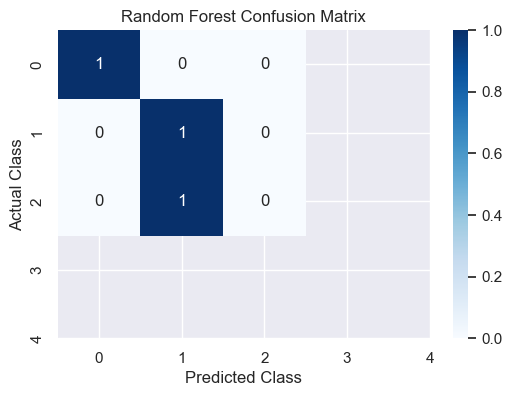

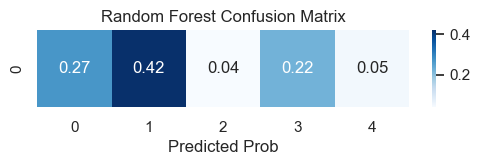

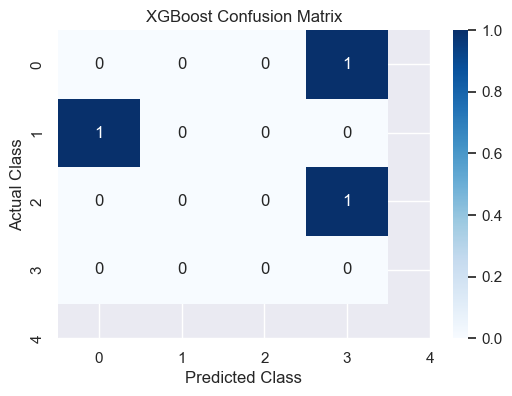

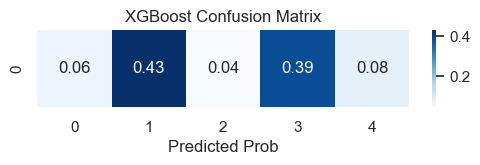

In [54]:
train_size = int(len(X) * 0.9)

X_train, y_train = X.iloc[:train_size], y.iloc[:train_size]
X_test, y_test = X.iloc[train_size:], y.iloc[train_size:]
#results = {}
for name, model in models.items():
    # Define the pipeline
    model_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Train the model
    model_pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = model_pipeline.predict(X_test)
    pred= model_pipeline.predict_proba(df_home_frw)

    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    plt.figure(figsize=(6,1))
    sns.heatmap(pred, annot=True, fmt='.2f', cmap='Blues', xticklabels=labels)
    plt.xlabel("Predicted Prob")
    plt.ylabel("")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    # Evaluate performance
    

### Model vs Home

In [55]:
target = "GAC"  # Goals For

# Separate features and target
X = df_home_ga.drop(columns=[target])
y = df_home_ga[target]
categorical_features = ["H/A"]  # Home/Away column
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()


In [56]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features)
])

In [57]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, objective='multi:softmax', 
                             num_class=6, eval_metric='mlogloss', random_state=42),
   # "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
   # "Linear Regression": LinearRegression()
}

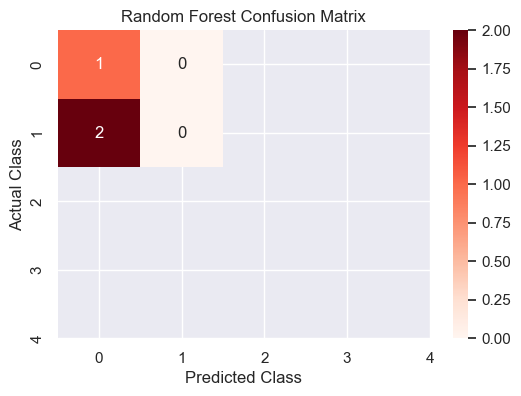

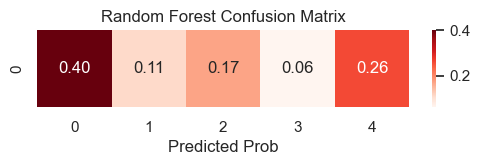

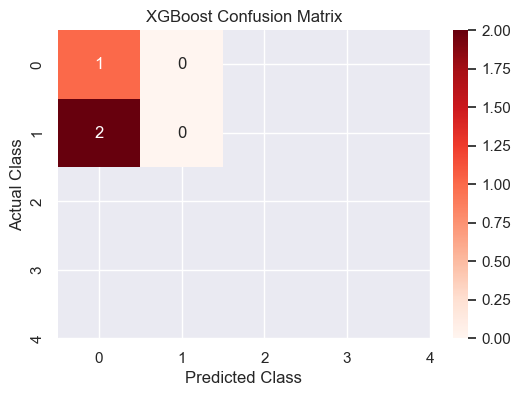

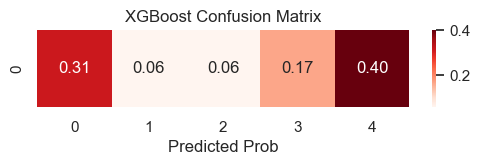

In [58]:
train_size = int(len(X) * 0.9)

X_train, y_train = X.iloc[:train_size], y.iloc[:train_size]
X_test, y_test = X.iloc[train_size:], y.iloc[train_size:]
#results = {}
for name, model in models.items():
    # Define the pipeline
    model_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Train the model
    model_pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = model_pipeline.predict(X_test)
    pred= model_pipeline.predict_proba(df_home_bcw)

    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    plt.figure(figsize=(6,1))
    sns.heatmap(pred, annot=True, fmt='.2f', cmap='Reds', xticklabels=labels)
    plt.xlabel("Predicted Prob")
    plt.ylabel("")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    # Evaluate performance
    

### Model Away

In [59]:
target = "GFC"  # Goals For

# Separate features and target
X = df_away_gf.drop(columns=[target])
y = df_away_gf[target]
categorical_features = ["H/A"]  # Home/Away column
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()


In [60]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features)
])

In [61]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, objective='multi:softmax', 
                             num_class=6, eval_metric='mlogloss', random_state=42),
   # "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
   # "Linear Regression": LinearRegression()
}

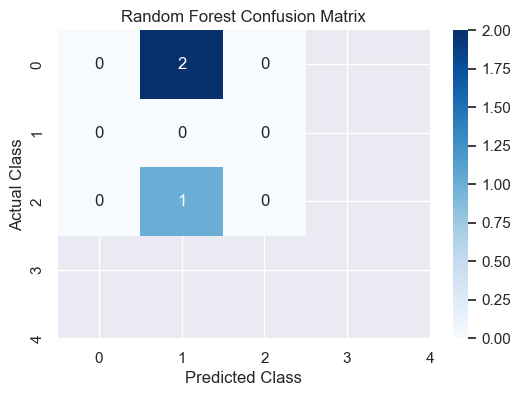

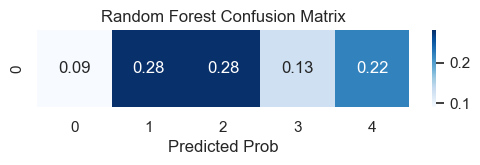

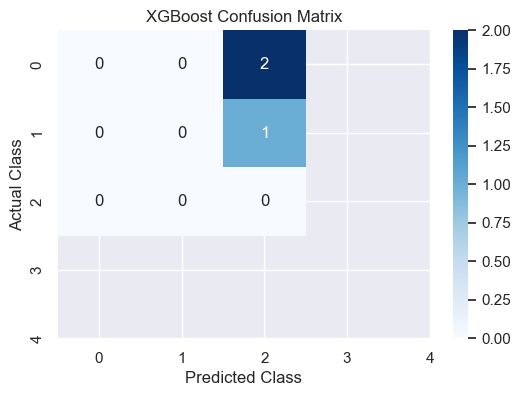

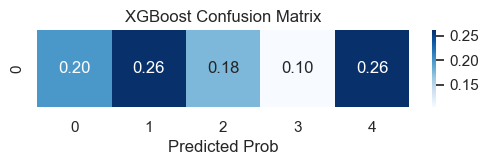

In [62]:
train_size = int(len(X) * 0.9)

X_train, y_train = X.iloc[:train_size], y.iloc[:train_size]
X_test, y_test = X.iloc[train_size:], y.iloc[train_size:]
#results = {}
for name, model in models.items():
    # Define the pipeline
    model_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Train the model
    model_pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = model_pipeline.predict(X_test)
    pred= model_pipeline.predict_proba(df_away_frw)

    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    plt.figure(figsize=(6,1))
    sns.heatmap(pred, annot=True, fmt='.2f', cmap='Blues', xticklabels=labels)
    plt.xlabel("Predicted Prob")
    plt.ylabel("")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    # Evaluate performance
    

### Model vs Away

In [63]:
target = "GAC"  # Goals For

# Separate features and target
X = df_away_ga.drop(columns=[target])
y = df_away_ga[target]
categorical_features = ["H/A"]  # Home/Away column
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()


In [64]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features)
])

In [65]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, objective='multi:softmax', 
                             num_class=6, eval_metric='mlogloss', random_state=42),
   # "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
   # "Linear Regression": LinearRegression()
}

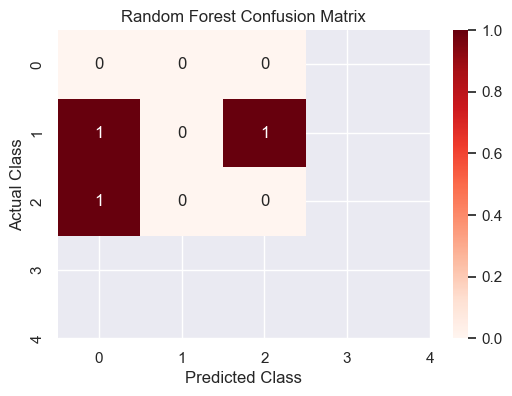

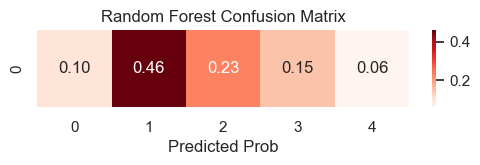

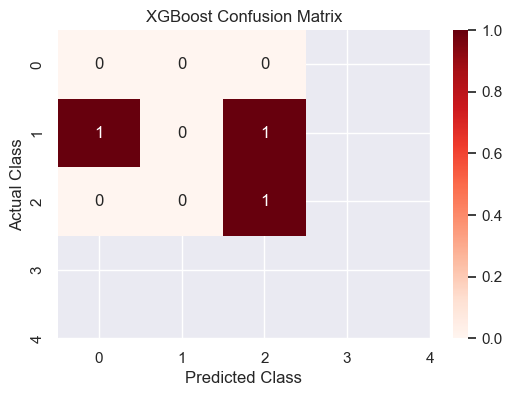

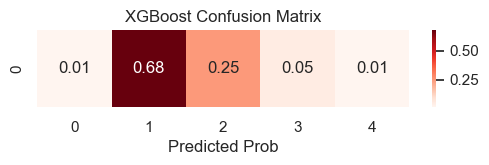

In [66]:
train_size = int(len(X) * 0.9)

X_train, y_train = X.iloc[:train_size], y.iloc[:train_size]
X_test, y_test = X.iloc[train_size:], y.iloc[train_size:]
#results = {}
for name, model in models.items():
    # Define the pipeline
    model_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Train the model
    model_pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = model_pipeline.predict(X_test)
    pred= model_pipeline.predict_proba(df_away_bcw)

    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    plt.figure(figsize=(6,1))
    sns.heatmap(pred, annot=True, fmt='.2f', cmap='Reds', xticklabels=labels)
    plt.xlabel("Predicted Prob")
    plt.ylabel("")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    # Evaluate performance
    

## Regression

### Model Home

In [67]:
target = "Tm_PTS"  # Goals For

# Separate features and target
X = df_home_gf.drop(columns=[target])
y = df_home_gf[target]
categorical_features = ["H/A"]  # Home/Away column
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()


In [68]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features)
])

In [69]:
model_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(n_estimators=20, random_state=25))
])

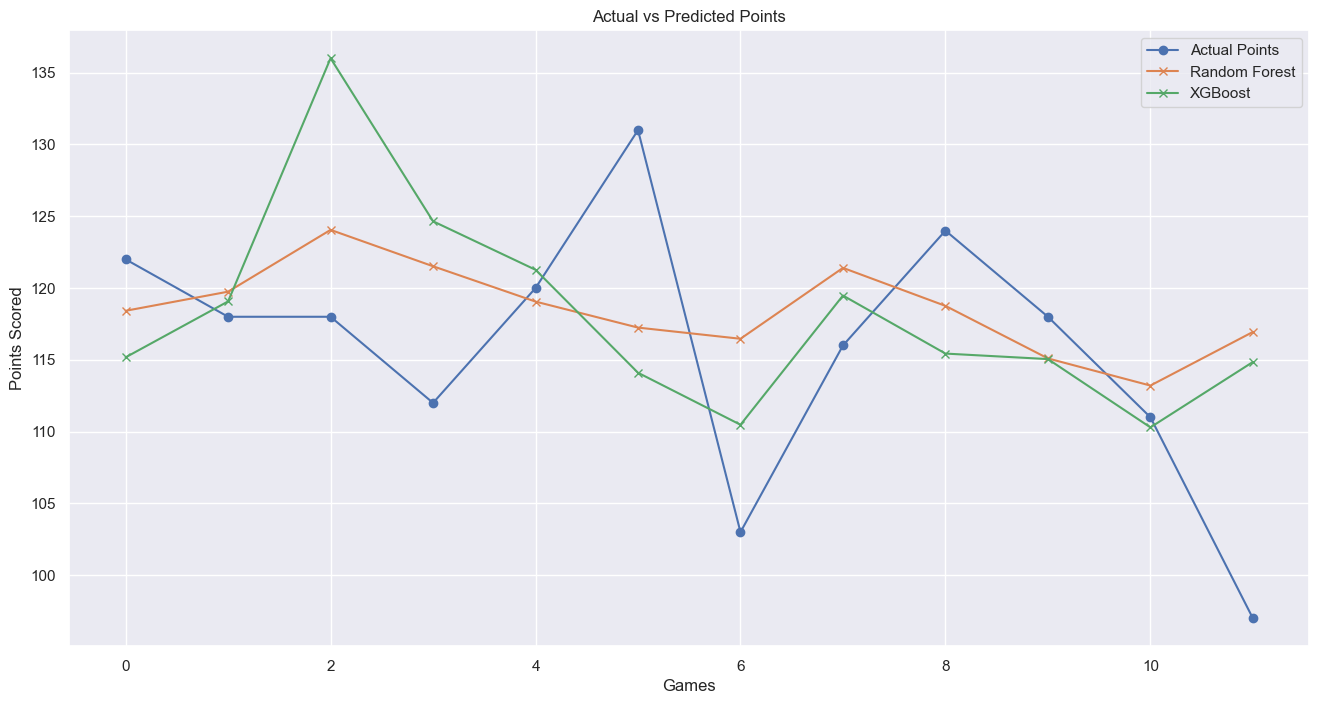

In [85]:
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
   # "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
   # "Linear Regression": LinearRegression()
}

# Split into training and testing sets
train_size = int(len(X) * 0.8)

X_train, y_train = X.iloc[:train_size], y.iloc[:train_size]
X_test, y_test = X.iloc[train_size:], y.iloc[train_size:]
# Train and evaluate each model
results = {}
plt.figure(figsize=(16,8))
plt.plot(y_test.values, label='Actual Points', marker='o')
for name, model in models.items():
    # Define the pipeline
    model_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Train the model
    model_pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = model_pipeline.predict(X_test)
    plt.plot(y_pred, label=name, marker='x')
    
    # Evaluate performance
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    pred= model_pipeline.predict(df_home_frw)
    
    results[name] = {"MAE": mae, "RMSE": rmse, "PRED": pred[0]}

# Convert results to a DataFrame and display
results_df = pd.DataFrame(results).T
plt.legend()
plt.title("Actual vs Predicted Points")
plt.xlabel("Games")
plt.ylabel("Points Scored")
plt.show()

In [80]:
results_df

,MAE,RMSE,PRED
Random Forest,7.063876,9.047376,117.443289
XGBoost,8.145854,10.362132,118.500099


### Model vs Home

In [48]:
target = "Opp_PTS"  # Goals For

# Separate features and target
X = df_home_ga.drop(columns=[target])
y = df_home_ga[target]
categorical_features = ["H/A"]  # Home/Away column
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()


In [49]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features)
])

In [50]:
model_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(n_estimators=20, random_state=25))
])

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=25)

# Train the model
model_pipeline.fit(X_train, y_train)

# Predictions
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")


MAE: 13.425
RMSE: 14.329


In [52]:
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression()
}

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=25)

# Train and evaluate each model
results = {}
for name, model in models.items():
    # Define the pipeline
    model_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Train the model
    model_pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = model_pipeline.predict(X_test)
    
    # Evaluate performance
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    pred= model_pipeline.predict(df_home_bcw)
    
    results[name] = {"MAE": mae, "RMSE": rmse, "PRED": pred}

# Convert results to a DataFrame and display
results_df = pd.DataFrame(results).T

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000991 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6818
[LightGBM] [Info] Number of data points in the train set: 52, number of used features: 405
[LightGBM] [Info] Start training from score 108.211538
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [53]:
results_df

,MAE,RMSE,PRED
Random Forest,13.041667,13.840622,[108.75]
XGBoost,13.151134,15.03493,[113.32865]
LightGBM,16.852781,18.445559,[102.71760442340414]
Linear Regression,24.528301,25.202121,[84.73789959470245]


### Model Away

In [54]:
target = "Tm_PTS"  # Goals For

# Separate features and target
X = df_away_gf.drop(columns=[target])
y = df_away_gf[target]
categorical_features = ["H/A"]  # Home/Away column
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()


In [55]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features)
])

In [57]:
model_pipeline2 = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(n_estimators=20, random_state=25))
])

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=25)

# Train the model
model_pipeline2.fit(X_train, y_train)

# Predictions
y_pred = model_pipeline2.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")


MAE: 12.708
RMSE: 14.490


In [59]:
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression()
}

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=25)

# Train and evaluate each model
results = {}
for name, model in models.items():
    # Define the pipeline
    model_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Train the model
    model_pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = model_pipeline.predict(X_test)
    
    # Evaluate performance
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    pred= model_pipeline.predict(df_away_frw)
    
    results[name] = {"MAE": mae, "RMSE": rmse, "PRED": pred}

# Convert results to a DataFrame and display
results_df = pd.DataFrame(results).T

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000461 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6654
[LightGBM] [Info] Number of data points in the train set: 51, number of used features: 405
[LightGBM] [Info] Start training from score 121.941176
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [60]:
results_df

,MAE,RMSE,PRED
Random Forest,14.915,16.475376,[120.74]
XGBoost,12.521159,13.834184,[121.489395]
LightGBM,13.837515,17.031631,[126.221659266553]
Linear Regression,14.006226,16.370987,[137.60611314295068]


### Model vs Away

In [61]:
target = "Opp_PTS"  # Goals For

# Separate features and target
X = df_away_ga.drop(columns=[target])
y = df_away_ga[target]
categorical_features = ["H/A"]  # Home/Away column
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()


In [62]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features)
])

In [63]:
model_pipeline2 = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(n_estimators=20, random_state=25))
])

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=25)

# Train the model
model_pipeline2.fit(X_train, y_train)

# Predictions
y_pred = model_pipeline2.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")


MAE: 10.350
RMSE: 11.309


In [65]:
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression()
}

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=25)

# Train and evaluate each model
results = {}
for name, model in models.items():
    # Define the pipeline
    model_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Train the model
    model_pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = model_pipeline.predict(X_test)
    
    # Evaluate performance
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    pred= model_pipeline.predict(df_away_bcw)
    
    results[name] = {"MAE": mae, "RMSE": rmse, "PRED": pred}

# Convert results to a DataFrame and display
results_df = pd.DataFrame(results).T

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000408 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6692
[LightGBM] [Info] Number of data points in the train set: 51, number of used features: 405
[LightGBM] [Info] Start training from score 110.666667
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [66]:
results_df

,MAE,RMSE,PRED
Random Forest,11.596667,12.906048,[108.99]
XGBoost,15.120514,16.820382,[102.5551]
LightGBM,9.838286,11.897321,[109.56588285586935]
Linear Regression,14.973625,19.146221,[86.82162740707135]
